In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import scipy.constants as cnst
import emcee
import corner

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.spines.right'] = False
#mpl.rcParams['axes.spines.top'] = False

In [2]:
NOMI = np.array(["indice", "csi", "theta", "theta_p", "g_csi", "f_csi", "h_csi", "alpha_csi"])
ORDINE = {nome: i for i,nome in enumerate(NOMI)}

In [8]:
table_Eulero = Table.read('build/Lane-Emden_Eulero_n=2.5.dat', names = NOMI,  format="ascii")
table_RK = Table.read('build/Lane-Emden_RK_n=2.5.dat', names = NOMI,  format="ascii")
table_Eulero, table_RK

(<Table length=11990>
 indice   csi    theta     theta_p    g_csi      f_csi      h_csi   alpha_csi
 int64  float64 float64    float64   float64    float64    float64   float64 
 ------ ------- -------- ----------- -------- ----------- --------- ---------
      0    0.01      1.0         0.0      1.0        -0.0       0.0       inf
      1   0.011      1.0      -0.001      1.0    1.21e-07 -0.272727   27152.6
      2   0.012 0.999999 -0.00181818 0.999998 2.61818e-07 -0.454545   16230.6
      3   0.013 0.999997 -0.00251515 0.999993  4.2506e-07 -0.580419   11749.9
      4   0.014 0.999995  -0.0031282 0.999987 6.13126e-07 -0.670328   9203.83
      5   0.015 0.999992  -0.0036813 0.999979 8.28292e-07 -0.736259   7531.47
      6   0.016 0.999988 -0.00419044  0.99997 1.07275e-06 -0.785707   6338.73
      7   0.017 0.999984  -0.0046666 0.999959 1.34865e-06 -0.823518   5441.72
      8   0.018 0.999979 -0.00511755 0.999948 1.65809e-06 -0.852925   4741.66
      9   0.019 0.999974 -0.00554888 0.999

In [9]:
data_Eulero = np.array( [ table_Eulero[nome] for nome in NOMI  ] ).T
indici_Eulero = data_Eulero[:, ORDINE["indice"] ]
csis_Eulero = data_Eulero[:, ORDINE["csi"] ]
thetas_Eulero = data_Eulero[:, ORDINE["theta"] ]

data_RK = np.array( [ table_RK[nome] for nome in NOMI  ] ).T
indici_RK = data_RK[:, ORDINE["indice"] ]
csis_RK = data_RK[:, ORDINE["csi"] ]
thetas_RK = data_RK[:, ORDINE["theta"] ]

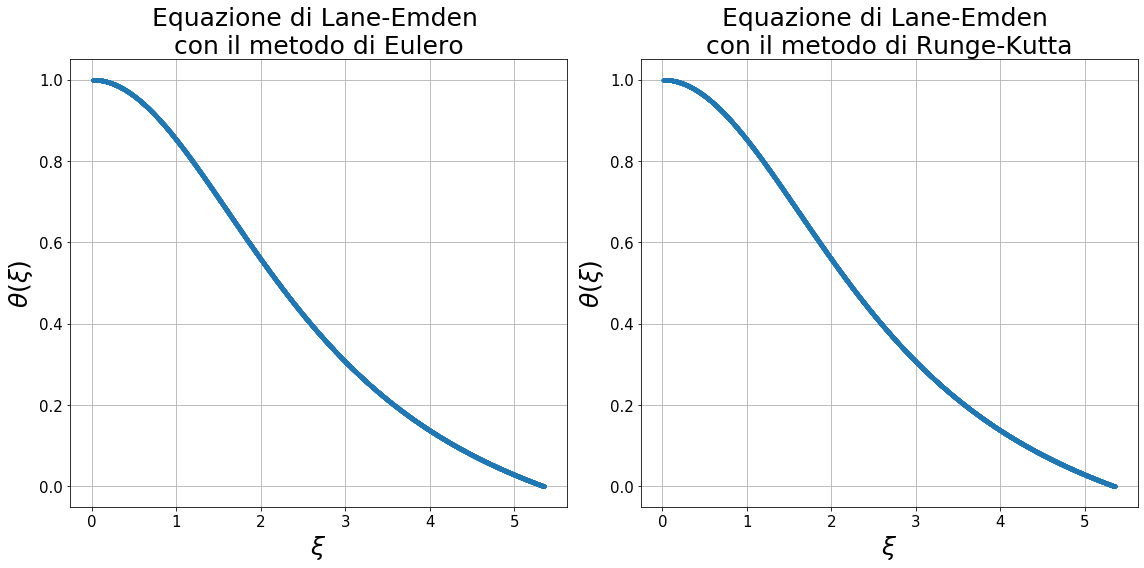

In [10]:
SIZE_ticks = 15
SIZE_labels = 25

fig, axs = plt.subplots(1, 2, figsize=(16, 8), tight_layout=True)
axs = axs.reshape(-1)

ax = axs[0]
ax.plot(csis_Eulero, thetas_Eulero, '.')
ax.grid()
ax.tick_params(axis="x", labelsize=SIZE_ticks)
ax.tick_params(axis="y", labelsize=SIZE_ticks)
ax.set_title("Equazione di Lane-Emden \ncon il metodo di Eulero", size=SIZE_labels)
ax.set_xlabel(r'$\xi$', size=SIZE_labels)
ax.set_ylabel(r'$\theta(\xi)$', size=SIZE_labels);

ax = axs[1]
ax.plot(csis_RK, thetas_RK, '.')
ax.grid()
ax.tick_params(axis="x", labelsize=SIZE_ticks)
ax.tick_params(axis="y", labelsize=SIZE_ticks)
ax.set_title("Equazione di Lane-Emden \ncon il metodo di Runge-Kutta", size=SIZE_labels)
ax.set_xlabel(r'$\xi$', size=SIZE_labels)
ax.set_ylabel(r'$\theta(\xi)$', size=SIZE_labels);

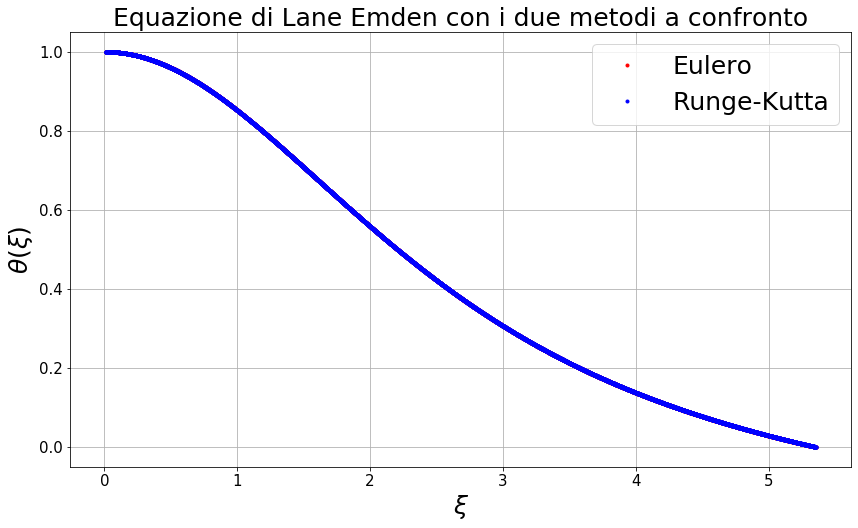

In [11]:
SIZE_ticks = 15
SIZE_labels = 25

fig = plt.figure(figsize=(14,8))

plt.plot(csis_Eulero, thetas_Eulero, '.', color = "red", label = "Eulero")
plt.plot(csis_RK, thetas_RK, '.', color = "blue", label = "Runge-Kutta")
plt.grid()

plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.title("Equazione di Lane Emden con i due metodi a confronto", size=SIZE_labels)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\theta(\xi)$', size=SIZE_labels)
plt.legend(prop={"size":25});

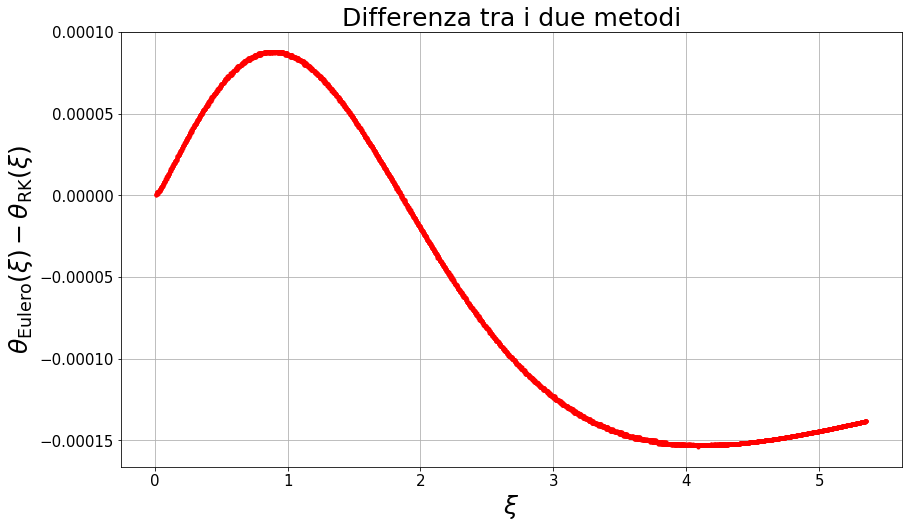

In [12]:
SIZE_ticks = 15
SIZE_labels = 25

fig = plt.figure(figsize=(14,8))

plt.plot(csis_Eulero, thetas_Eulero - thetas_RK, '.', color = "red", label = "Eulero")
plt.grid()

plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.title("Differenza tra i due metodi", size=SIZE_labels)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\theta_{\mathrm{Eulero}}(\xi) - \theta_{\mathrm{RK}}(\xi) $', size=SIZE_labels);